In [ ]:
# INSTRUÇÃO

#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

In [35]:
#importar a base de dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importar base de dados eexibir tabela
tabela = pandas.read_csv(r"arquivos\advertising.csv")
print(tabela)
# indentificar e tratar os dados ds base de dados
print(tabela.info())
print(tabela.corr())


        TV  Radio  Jornal  Vendas
0    230.1   37.8    69.2    22.1
1     44.5   39.3    45.1    10.4
2     17.2   45.9    69.3    12.0
3    151.5   41.3    58.5    16.5
4    180.8   10.8    58.4    17.9
..     ...    ...     ...     ...
195   38.2    3.7    13.8     7.6
196   94.2    4.9     8.1    14.0
197  177.0    9.3     6.4    14.8
198  283.6   42.0    66.2    25.5
199  232.1    8.6     8.7    18.4

[200 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0

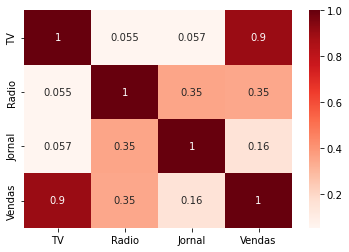

In [36]:

#CRIAR GRÁFICA
sns.heatmap(tabela.corr(), cmap='Reds', annot=True)
plt.show()

In [37]:
# usando inteligencia artificial

from sklearn.model_selection import train_test_split

y = tabela['Vendas']
x = tabela[['TV', 'Radio', 'Jornal']]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [38]:
# importar a inteligencia artificial

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#criar a inteligência artificialLinearRegression
modelo_regrecao_linear = LinearRegression()
modelo_arvore_de_decicao = RandomForestRegressor()

#treinar a inteligencia artificial

modelo_regrecao_linear.fit(x_treino, y_treino)
modelo_arvore_de_decicao.fit(x_treino, y_treino)



RandomForestRegressor()

In [39]:
from sklearn import metrics

# criar as previsoes
previsao_regrecao_linear = modelo_regrecao_linear.predict(x_teste)
previsao_arvore_de_decicao = modelo_arvore_de_decicao.predict(x_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_arvore_de_decicao))
print(metrics.r2_score(y_teste, previsao_arvore_de_decicao))

0.9617830534285344
0.9617830534285344


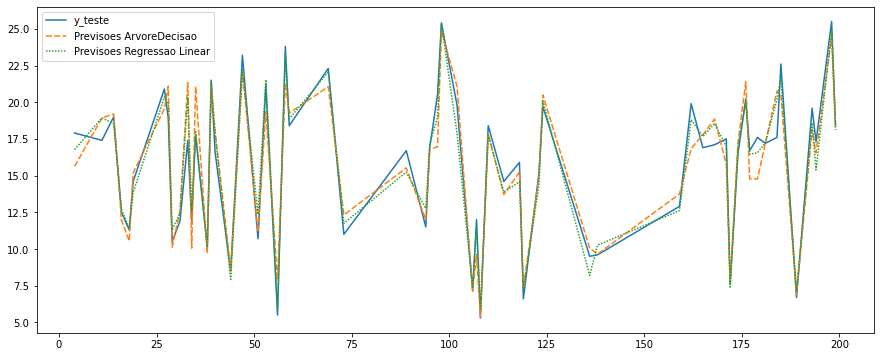

In [40]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_regrecao_linear
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_arvore_de_decicao

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()